In [1]:
def wrangle(db_path):       ( the path to the database will be supply by the user, who is using the function)
    # Connect to database
    conn = sqlite3.connect(db_path)
​
    # Construct query
    query = """
        SELECT distinct(i.building_id) AS b_id,
           s.*,
           d.damage_grade
        FROM id_map AS i
        JOIN building_structure AS s ON i.building_id = s.building_id
        JOIN building_damage AS d ON i.building_id = d.building_id
        WHERE district_id = 4
    """
​
    # Read query results into DataFrame
    df = pd.read_sql(query, conn, index_col="b_id")  (like read csv we have read sql)
    start wrangling
    #identify leaky columns   
    drop_cols=[col for col in df.columns if "post_eq" in col] ( GIVE ME COLUMN IN DF.COLUMN IF THE COLUMN HAS POST_EQ IN COL)(1)
    df["damage_grade"]= df["damage_grade"].str [-1].astype(int)( WE HAVE GRADE 1, GRADE 2.....5, ITS AN OBJECT, 
                                                                WE ONLY NEED THE NUMBER TO MAKE PREDICTION WE GET 
                                                                THE NUMBER FROM THE OBJECT(-1) SO WE CONVERT FROM STRING TO INTERGER)
                                                                WE ALSO NEED TO CLASSIFY OUR DATA INTO 1-3 =0(NOT SEVERLY DAMAGE) 4-5=1( SEVERLY DAMAGE) COS WE ARE DEALING WITHBINARY CLASSIFICATION)
        
    df["severe_damage"]= (df["damage_grade"] > 3).astype(int)    ( GREATER THAN 3 GIVE US THUE LESS THAN 3 GIVE US FIRST(BINARY TARGET), ASTYPEINT CONVERT IT TO 1 OR 0)
    
    #drop old target
    drop_cols.append("damage_grade")  (DROP DAMAGE GRADE)
    
    #drop multicollinearity column
    drop_cols.append("count_floors_pre_eq")
    #drop high- cardinality
    drop_cols.append("building_id")

    df.drop(columns= drop_cols, inplace= True) ( DROPPING THE COLUMN WE IDENTIFY IN 1)

    
    return df
    
    
Task 4.2.1: Complete the wrangle function above so that the it returns the results of query as a DataFrame. 
Be sure that the index column is set to "b_id". Also, the path to the SQLite database is "/home/jovyan/nepal.sqlite".
    
df = wrangle("/home/jovyan/nepal.sqlite")  (put it in a dataframe)
df.head()



something to play with check below


#df["damage_grade"]= df["damage_grade"].str [-1].astype(int)
#df["severe_damage"]= (df["damage_grade"] > 3).astype(int)
#drop old target
#drop_cols.append("damage_grade")




#print(df["severe_damage"].value_counts())




#df["severe_damage"].corr(df["count_floors_pre_eq"])
#drop multicollinearity column
#drop_cols.append("count_floors_pre_eq")

SyntaxError: invalid non-printable character U+200B (1114571878.py, line 4)

In [1]:
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from category_encoders import OneHotEncoder
from IPython.display import VimeoVideo
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.utils.validation import check_is_fitted

warnings.simplefilter(action="ignore", category=FutureWarning)

In [2]:
df = pd.read_csv("\\Users\\User\\sql project 4\\earth quarke data .csv").set_index("b_id")     
#df= pd.read_csv("C:\\Users\\User\\sql project 4\\earth quarke data .csv")
#df["buiding damage"].fillna(df["buiding damage"].mean(), inplace=True)
df["buiding damage"]=df["buiding damage"].fillna(0)

In [3]:
df.head(50)

,age_building,plinth_area_sq_ft,height_ft_pre_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,superstructure,buiding damage
b_id,,,,,,,,,,,,
316158,27,382,20,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Attached-1 side,Rectangular,"Stone, mud mortar",1.0
316175,5,360,14,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,"Stone, mud mortar",1.0
316192,11,450,20,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Attached-1 side,Rectangular,"Stone, mud mortar",1.0
316202,40,360,18,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,TImber/Bamboo-Mud,Not attached,Square,"Stone, mud mortar",1.0
316206,1,405,7,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,"Stone, mud mortar",1.0
316207,6,410,14,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,"Stone, mud mortar",1.0
316208,4,461,7,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,"Stone, mud mortar",1.0
316211,20,360,14,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,"Stone, mud mortar",1.0
316219,0,155,12,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Not applicable,Attached-1 side,Rectangular,"Stone, mud mortar",1.0


In [4]:
df["buiding damage"].isnull().sum()

0

In [ ]:
check for leakage: since we want our model to predict pre earthquake we have to remove features that will give infomation about the earh quake
anything that have post earth quake hould be deleted.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9802 entries, 316158 to 414110
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age_building            9802 non-null   int64  
 1   plinth_area_sq_ft       9802 non-null   int64  
 2   height_ft_pre_eq        9802 non-null   int64  
 3   land_surface_condition  9802 non-null   object 
 4   foundation_type         9802 non-null   object 
 5   roof_type               9802 non-null   object 
 6   ground_floor_type       9802 non-null   object 
 7   other_floor_type        9802 non-null   object 
 8   position                9802 non-null   object 
 9   plan_configuration      9802 non-null   object 
 10  superstructure          9802 non-null   object 
 11  buiding damage          9802 non-null   float64
dtypes: float64(1), int64(3), object(8)
memory usage: 995.5+ KB


In [ ]:
# Create correlation matrix
#correlation = df.select_dtypes("number").drop(columns="severe_damage").corr()
#correlation
#sns.heatmap(correlation)
# Plot heatmap of `correlation`

#if we have two quqntity that are corelated as regard our heat map we can use the this 
#df["severe_damage"].corr(df["count_floors_pre_eq"]) to check the one that is more correlated based on value. we do the correlation with our target we drop the one that has the least correlation with out target.


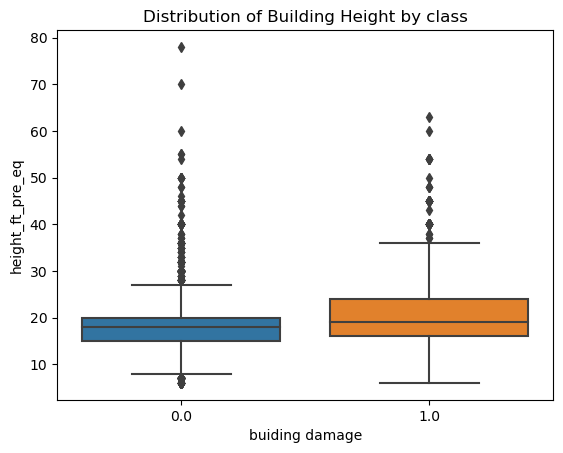

In [6]:
#Task 4.2.6: Use seaborn to create a boxplot that shows the distributions of the "height_ft_pre_eq" column for both groups in the "buiding damage" column. Remember to label your axes.

#Create boxplo
sns.boxplot(x="buiding damage", y="height_ft_pre_eq", data=df)
# Label axes
plt.xlabel("buiding damage")
plt.ylabel("height_ft_pre_eq")
plt.title("Distribution of Building Height by class");


In [7]:
print(df["buiding damage"].value_counts())

0.0    8693
1.0    1109
Name: buiding damage, dtype: int64


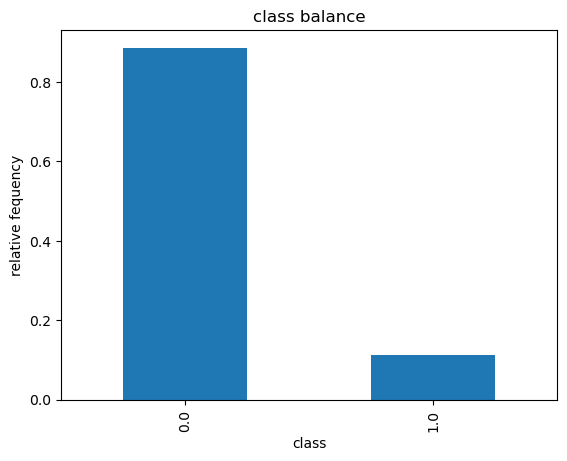

In [9]:
#Task 4.2.7: Create a bar chart of the value counts for the "buiding damage" column. You want to calculate the relative frequencies of the classes, not the raw count,
#so be sure to set the normalize argument to True.
# Plot value counts of `"severe_damage"`
df["buiding damage"].value_counts(normalize=True).plot(
     kind="bar", xlabel="class",ylabel="relative fequency", title= "class balance"
);



#class 1 is positive class (severe damage)( minority class)
#class 0 is negative class(non severe damage)(majority class)
#our data is not wellbalance ( we are suppose to balance it but i wiil do that under random forest)

In [10]:
#Task 4.2.8: Create two variables, majority_class_prop and minority_class_prop,
#to store the normalized value counts for the two classes in df["severe_damage"].



majority_class_prop, minority_class_prop = df["buiding damage"].value_counts(normalize=True)
print(majority_class_prop, minority_class_prop)

# i think the problem with model comes from here, the data is not balance( the diffence between our class is too much)

0.886859824525607 0.11314017547439298


In [13]:
#Task 4.2.9: Are buildings with certain foundation types more likely to suffer severe damage? Create a pivot table of df where the index is "foundation_type" and the values come from the "severe_damage" column,
#aggregated by the mean.




# Create pivot table
foundation_pivot = pd.pivot_table(
    df,index="foundation_type", values="buiding damage", aggfunc=np.mean
).sort_values(by="buiding damage")
foundation_pivot

#let put this into a picture.

,buiding damage
foundation_type,
Mud mortar-Stone/Brick,0.090029
Bamboo/Timber,0.093750
Other,0.111111
Cement-Stone/Brick,0.121101
RC,0.388571


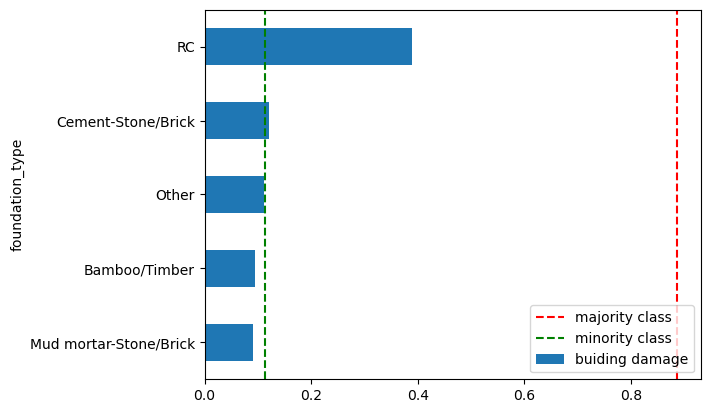

In [14]:
#How do the proportions in foundation_pivot compare to the proportions for our majority and minority classes? Plot foundation_pivot as horizontal bar chart, 
#adding vertical lines at the values for majority_class_prop and minority_class_prop.



# Plot bar chart of `foundation_pivot`
foundation_pivot.plot(kind="barh", legend= None)
#i will add vertical line to show boundary btw for majority and minority
plt.axvline(
    majority_class_prop, linestyle="--", color="red", label="majority class"  #axvaxis vertical line
)

#let put minority class also
plt.axvline(
    minority_class_prop, linestyle="--", color="green" , label="minority class"
)
plt.legend(loc="lower right");

In [15]:
#Task 4.2.12:** Create your feature matrix `X` and target vector `y`. Your target is `"severe_damage"`







target = "buiding damage"
#["foundation_type", "roof_type", "ground_floor_type","other_floor_type","position", "plan_configuration","superstructure"]
X = df.drop(columns=target)
y = df[target]


In [16]:
#task 4.2.13: Divide your data (X and y) into training and test sets using a randomized train-test split. 
#Your test set should be 20% of your total data. And don't forget to set a random_state for reproducibility.



X_train, X_test, y_train, y_test =train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (7841, 11)
y_train shape: (7841,)
X_test shape: (1961, 11)
y_test shape: (1961,)


In [17]:
#Frequent Question: Why do we set the random state to 42?

#Answer: The truth is you can pick any integer when setting a random state. 
#The number you choose doesn't affect the results of your project; it just makes sure that your work is reproducible so that others can verify it.
#However, lots of people choose 42 because it appears in a well-known work of science fiction called The Hitchhiker's Guide to the Galaxy. 
#In short, it's an inside joke. 😉

In [18]:
#Build Model
 #Baseline
    
    
#in MEA you dont need to get it accurately but close to your prediction cos its continous   
#Calculate the baseline accuracy score for your model.
note: accuracy score goes btween o and 1. o is not good but 1 is nice.  in accuracy score you must be accurate

#y_train.value_counts(normalize=True).max() run it first


acc_baseline =y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 2))

Baseline Accuracy: 0.89


In [ ]:
#NOTE:the one in the project is 0.64 and we neeed to get above that so that our model can add value. remember we said accuracy score of 1 is perfect or nice

In [19]:
#Iterate


#task 4.2.15: Create a pipeline named model that contains a OneHotEncoder transformer and a LogisticRegression predictor.
#Be sure you set the use_cat_names argument for your transformer to True. 
#Then fit it to the training data.



model = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    LogisticRegression(max_iter=1000)
)
# Fit model to training data
model.fit(X_train, y_train)







#Tip: If you get a ConvergenceWarning when you fit your model to the training data, don't worry. This can sometimes happen with logistic regression models. 
#Try setting the max_iter argument in your predictor to 1000.

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['land_surface_condition',
                                     'foundation_type', 'roof_type',
                                     'ground_floor_type', 'other_floor_type',
                                     'position', 'plan_configuration',
                                     'superstructure'],
                               use_cat_names=True)),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [21]:
#Task 4.2.16: Calculate the training and test accuracy scores for your models.


#There are two ways to calculate accuracy score in scilearn  
#1)accuracy_score(y_train, model.predict(X_train))
#2model.score(X_test, y_test)


acc_train = accuracy_score(y_train, model.predict(X_train))
acc_test = model.score(X_test, y_test)

print("Training Accuracy:", round(acc_train, 2))
print("Test Accuracy:", round(acc_test, 2))




# if there are too much differnce between our training and testing data, its means our model is not genegralizing well.

Training Accuracy: 0.89
Test Accuracy: 0.89


In [22]:
#Communicate


#Task 4.2.17: Instead of using the predict method with your model, try predict_proba with your training data. 
#How does the predict_proba output differ than that of predict? What does it represent?

#model.predict_proba(X_train) 
#(X_train)[:5]IT WILL GIVE YOU AN ARRAY 0 0 0 1 0


y_train_pred_proba = model.predict_proba(X_train)
print(y_train_pred_proba[:5])

[[0.75178732 0.24821268]
 [0.93590728 0.06409272]
 [0.94371287 0.05628713]
 [0.89749567 0.10250433]
 [0.9092855  0.0907145 ]]


In [ ]:
#FROM ABOVE

#COLUMN I REPRESENT NOT SEVERLY DAMAGE
#COLUMN 2 REPRESENT SEVERLY DAMAGE

#LET LOOK AT THE ONE ON THE RIGHT
#0.24821268] PROBABILITY OF DAMAGE IS O.2 CLOSE TO 0 NORT NICE
#0.06409272] NOT NICE 
#0.05628713]  NOTE NICE
#0.10250433] ABOVE 0.5   NICE
#0.0907145   ABOVE 0.5  NOT NICE

#THIS GIVE US HOW CERTAIN OUR MODEL IS WITH PREDICTION, this model is NOT REALLY CERTAIN ACTUALLY.

In [24]:

#Task 4.2.18: Extract the feature names and importances from your model.

features = model.named_steps["onehotencoder"].get_feature_names() 
importances = model.named_steps["logisticregression"].coef_[0]

In [26]:
#Task 4.2.19: Create a pandas Series named odds_ratios, where the index is features and the values are your the exponential of the importances. 
#How does odds_ratios for this model look different from the other linear models we made in projects 2 and 3?

#Create a Series in pandas.


odds_ratios =pd.Series(np.exp(importances), index=features).sort_values() # np.exp =numpy.exponential
odds_ratios.head()


superstructure_RC, non-engineered    0.400838
position_Not attached                0.409564
other_floor_type_Timber-Planck       0.448680
plan_configuration_Square            0.481297
land_surface_condition_Flat          0.505973
dtype: float64

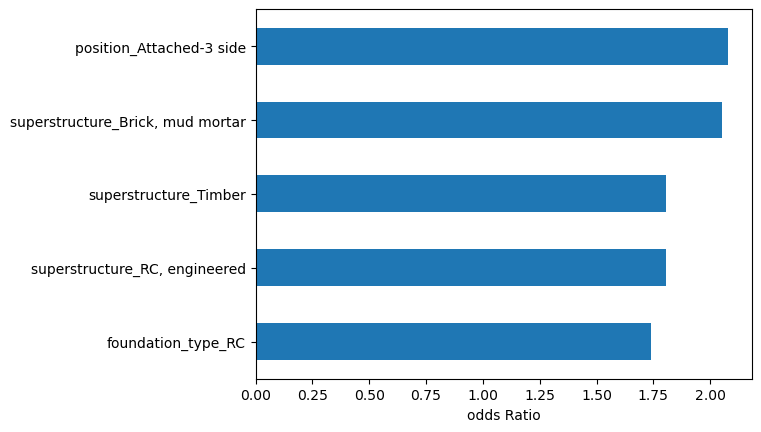

In [27]:
#Task 4.2.20: Create a horizontal bar chart with the five largest coefficients from odds_ratios. Be sure to label your x-axis "Odds Ratio".



# Horizontal bar chart, five largest coefficients
odds_ratios.tail().plot(kind="barh")
plt.xlabel("odds Ratio");

In [ ]:
#from the graph( features associated with increase in sevsre damage)

#the probability of bulding with position attacached 3 side to suffer damage is 2.00 higher than the rest. that means buiding has the probability to damage  by multipy of 2 or 200%. any odd ratio of  above 1 increase the odd that our features is severally damage


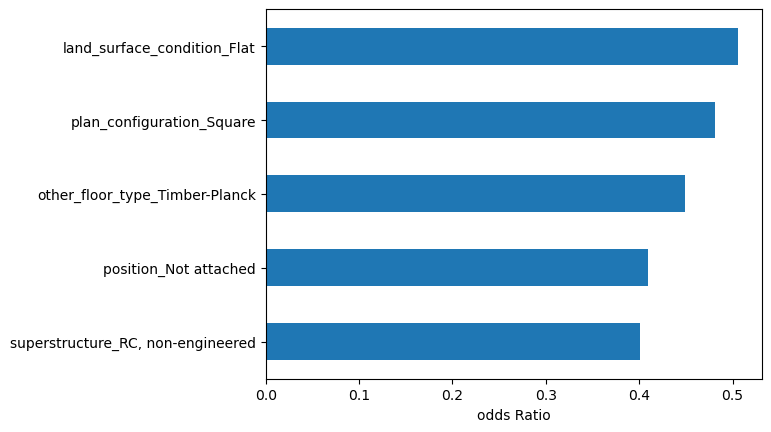

In [29]:
#Create a horizontal bar chart with the five smallest coefficients from odds_ratios. Be sure to label your x-axis "Odds Ratio".


# Horizontal bar chart, five smallest coefficients
odds_ratios.head().plot(kind="barh")
plt.xlabel("odds Ratio");


In [ ]:
#from the graph( features associated with increase in non severe damage)

#everythig is below one it means building with land surface condition flat has o.5 percent chance of less sever damage